In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Customer Segmentation.csv')

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
x=data.iloc[:,3].values
y=data.iloc[:,4].values

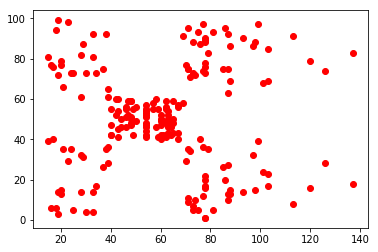

In [5]:
plt.scatter(x,y,color='red')

In [6]:
#from our naked eye we can see 5 clusters. but we will let the algorithm decide this

In [7]:
from sklearn.cluster import KMeans

In [8]:
x=data.iloc[:,3:].values
x.shape

(200, 2)

In [9]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

In [10]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30566.451130251862,
 25043.890043290045,
 21916.794789843727,
 19643.655552199736]

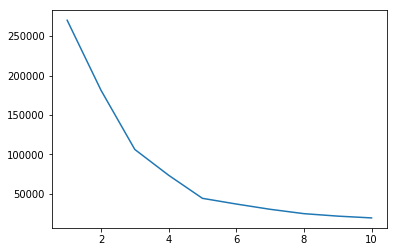

In [11]:
plt.plot(range(1,11),wcss)

In [12]:
#this graph is known as elbow curve
#the elbow point gives the no. of clusters needed for the data
#we will choose the point where the steepness in the curve is less which shows that the distance from my centroid to the points on my cluster is less or is almost equal to zero.

In [13]:
#now from where i know the no. of clusters needed is 5

In [14]:
km=KMeans(n_clusters=5)
km.fit(x)
y=km.predict(x)

In [15]:
y

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 2, 4, 3, 4, 3, 4,
       2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

In [16]:
x[y==4] #this gives us the 5th cluster

array([[ 69,  91],
       [ 70,  77],
       [ 71,  95],
       [ 71,  75],
       [ 71,  75],
       [ 72,  71],
       [ 73,  88],
       [ 73,  73],
       [ 74,  72],
       [ 75,  93],
       [ 76,  87],
       [ 77,  97],
       [ 77,  74],
       [ 78,  90],
       [ 78,  88],
       [ 78,  76],
       [ 78,  89],
       [ 78,  78],
       [ 78,  73],
       [ 79,  83],
       [ 81,  93],
       [ 85,  75],
       [ 86,  95],
       [ 87,  63],
       [ 87,  75],
       [ 87,  92],
       [ 88,  86],
       [ 88,  69],
       [ 93,  90],
       [ 97,  86],
       [ 98,  88],
       [ 99,  97],
       [101,  68],
       [103,  85],
       [103,  69],
       [113,  91],
       [120,  79],
       [126,  74],
       [137,  83]], dtype=int64)

In [17]:
x[y==4,1] #this gives us the 5th cluster's 2nd column

array([91, 77, 95, 75, 75, 71, 88, 73, 72, 93, 87, 97, 74, 90, 88, 76, 89,
       78, 73, 83, 93, 75, 95, 63, 75, 92, 86, 69, 90, 86, 88, 97, 68, 85,
       69, 91, 79, 74, 83], dtype=int64)

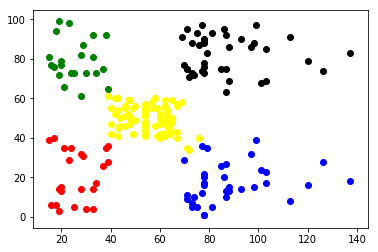

In [18]:
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="green")
plt.scatter(x[y==2,0],x[y==2,1],color="yellow")
plt.scatter(x[y==3,0],x[y==3,1],color="blue")
plt.scatter(x[y==4,0],x[y==4,1],color="black")

x axis - salary
y axis - no. of customers

**red points - depicts the people who earn less and shop less on Myntra**

**green points - depicts the people who earn less but buy more on Myntra**

**yellow points - depicts the people who earn neither less nor high and spends neither too much nor too less on Myntra**

**black points - depicts the people who earns and lot and spends a lot on Myntra**

**blue points - depicts the people who earns a lot but buy less on Myntra**

# We have got 5 clusters. So, Myntra can create it's 5 outlets in the centroid of these 5 clusters.

**But I personally feel, 4 outlets will run good with high profit. We need not have to create the 5th outlet in the red cluster. Because their probablity of buying is very less.**